📌 **Purpose:** This notebook will handle;

- Cleaning of data
- Treatment of missing values
- Formatting data features to suitable formats

In [4]:
# Load packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load data
df = pd.read_csv("../data/student_data.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## 1. Data Preprocessing

In [8]:
# Normalize column names
df.columns = df.columns.str.lower()

# Convert StudentID to string
df['studentid'] = df['studentid'].astype('object')

# Descriptive summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   studentid          2392 non-null   object 
 1   age                2392 non-null   int64  
 2   gender             2392 non-null   int64  
 3   ethnicity          2392 non-null   int64  
 4   parentaleducation  2392 non-null   int64  
 5   studytimeweekly    2392 non-null   float64
 6   absences           2392 non-null   int64  
 7   tutoring           2392 non-null   int64  
 8   parentalsupport    2392 non-null   int64  
 9   extracurricular    2392 non-null   int64  
 10  sports             2392 non-null   int64  
 11  music              2392 non-null   int64  
 12  volunteering       2392 non-null   int64  
 13  gpa                2392 non-null   float64
 14  gradeclass         2392 non-null   float64
dtypes: float64(3), int64(11), object(1)
memory usage: 280.4+ KB


In [9]:
# Check duplicates
print('Duplicated Entries: ',df.duplicated().sum(),'\n')

print('Duplicated student IDs: ',df['studentid'].duplicated().sum())

Duplicated Entries:  0 

Duplicated student IDs:  0


In [10]:
# Inspect gradeclass column
df['gradeclass'].value_counts()

4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: gradeclass, dtype: int64

Up to this point the dataset is cleaned, there are no missing values, no duplicates, data types are corrected, and column names are normalized.

## 2. Exploratory Data Analysis

In [11]:
# Summary statistics
df.describe()

,age,gender,ethnicity,parentaleducation,studytimeweekly,absences,tutoring,parentalsupport,extracurricular,sports,music,volunteering,gpa,gradeclass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


### 2.1 Univariate Analysis

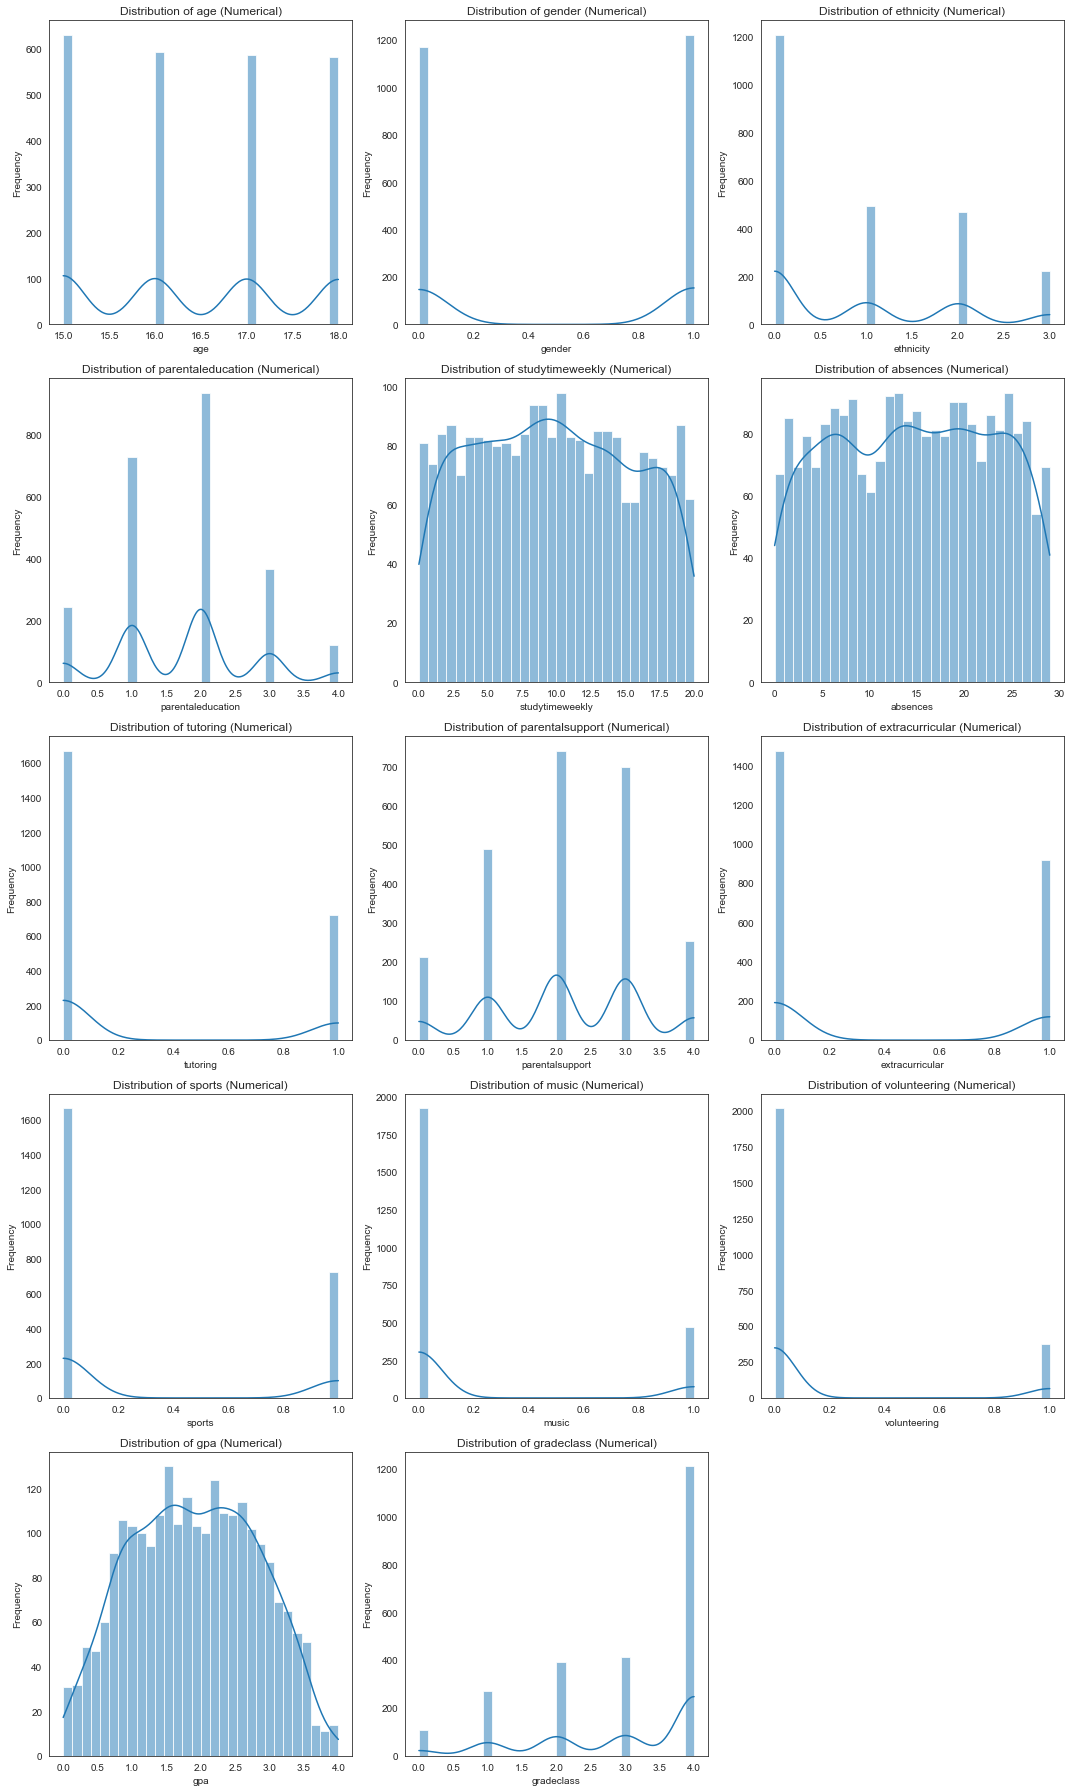

In [ ]:
# Filter numeric columns
numeric_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

# Set the number of rows and columns for the grid
n_cols = 3  # Number of columns in the grid
n_rows = -(-len(numeric_columns) // n_cols)  # Calculate rows to fit all plots

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Plot each numeric column
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    sns.histplot(df[column], kde=True, bins=30, ax=ax)
    ax.set_title(f'Distribution of {column} (Numerical)')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Remove unused subplots
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])  # Delete any unused axes

plt.tight_layout()
plt.show()

### 2.1.1 Observations from Univariate Analysis

1. **Demographics:**
    - Slightly more female students than male students.
    - The majority of students belong to the Caucasian ethnicity, which is more than double the representation of African-American and Asian ethnicities. Other ethnicities form the minority group.

2. **Academic Performance:**
    - Mean GPA is **1.9**, with scores indicating a normal distribution.
    - A significant majority of students fall within the 'F' GradeClass (GPA < 2.0).
    - On average, students spend approximately **10 hours per week** studying.

3. **Attendance:**
    - Students miss school for an estimated total of **2 weeks** in a school calendar year on average.

4. **Parental and Tutoring Support:**
    - Most students receive **moderate to high parental support**.
    - A majority of students do not receive any tutoring outside of school.

5. **Extracurricular Activities:**
    - The majority of students are not actively participating in extracurricular activities, including sports, music, and volunteering.

6. **Age Distribution:**
    - The mean age of students is **16.5 years**.

7. **Parental Education:**
    - Most parents have attended **some college**, followed by those with high school certifications.
    - The least representation is observed among parents with higher education beyond a bachelor's degree.

### 2.2 Bivariate Analysis

gender
0    1.918679
1    1.894225
Name: gpa, dtype: float64


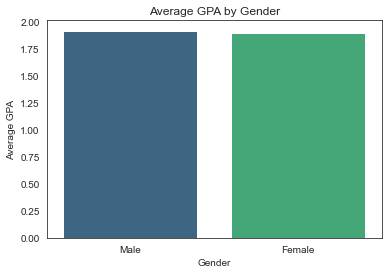

In [15]:
# # Performance by gender
print(df.groupby('gender')['gpa'].mean())
# Grouping by gender and calculating the mean GPA 
gpa_by_gender = df.groupby('gender')['gpa'].mean().reset_index() 
# Mapping gender to human-readable labels 
gpa_by_gender['gender'] = gpa_by_gender['gender'].map({0: 'Male', 1: 'Female'}) 
# Plotting a vertical bar graph with different colors 
sns.barplot(x='gender', y='gpa', data=gpa_by_gender, palette='viridis') 
plt.ylabel('Average GPA') 
plt.xlabel('Gender') 
plt.title('Average GPA by Gender') 
plt.show()

Male students have a slighly higher average GPA compared to their female counter-parts.

**Visualizing Participation by Gender**

   gender  extracurricular
0    Male              452
1  Female              465


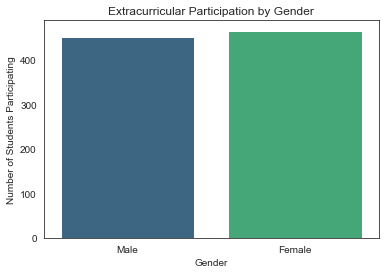

In [16]:
# Grouping by gender and calculating the count of extracurricular participation
extracurricular_by_gender = df.groupby('gender')['extracurricular'].sum().reset_index()

# Mapping gender to human-readable labels
extracurricular_by_gender['gender'] = extracurricular_by_gender['gender'].map({0: 'Male', 1: 'Female'})
print(extracurricular_by_gender)

# Bar plot for extracurricular participation by gender 
sns.barplot(x='gender', y='extracurricular', data=extracurricular_by_gender, palette='viridis') 
plt.ylabel('Number of Students Participating') 
plt.xlabel('Gender') 
plt.title('Extracurricular Participation by Gender') 
plt.show()

Slighly more female students are participatting in extracurricular activities than their male counterparts

   gender   absences
0    Male  14.355556
1  Female  14.719313


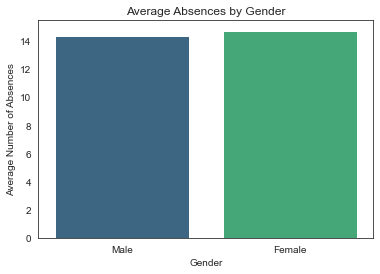

In [17]:
# Grouping by gender and calculating the mean absences
absences_by_gender = df.groupby('gender')['absences'].mean().reset_index()

# Mapping gender to human-readable labels
absences_by_gender['gender'] = absences_by_gender['gender'].map({0: 'Male', 1: 'Female'})
print(absences_by_gender)

# Bar plot for average absences by gender
sns.barplot(x='gender', y='absences', data=absences_by_gender, palette='viridis')
plt.ylabel('Average Number of Absences')
plt.xlabel('Gender')
plt.title('Average Absences by Gender')
plt.show()

In terms of absenteeism, female students happen to miss school more compared to male students on average, although the differences are quite small

### 2.3 Correlation Analysis

gradeclass           1.000000
absences             0.728633
parentaleducation    0.041031
gender               0.022998
volunteering         0.013156
age                 -0.006250
ethnicity           -0.023326
sports              -0.026654
music               -0.036065
extracurricular     -0.069733
tutoring            -0.111695
studytimeweekly     -0.134131
parentalsupport     -0.136823
gpa                 -0.782835
Name: gradeclass, dtype: float64


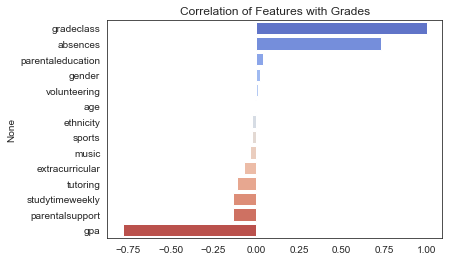

In [ ]:
# Compute Pearson correlation
correlations = df.corr()

# Sort by target variable (e.g., 'grades')
target_corr = correlations['gradeclass'].sort_values(ascending=False)

# Display correlations
print(target_corr)

# Visualize the top correlated features
sns.barplot(x=target_corr.values, y=target_corr.index, palette='coolwarm')
plt.title('Correlation of Features with Grades')
plt.show()

- `absences` and `gpa` are the most influential features for `gradeclass` based on correlation.
- Features like `parentaleducation`, `studytimeweekly`, and `parentalsupport` might also have some impact but are less significant.
- Correlation analysis is a good starting point, but further modeling and feature importance analysis will provide deeper insights.

### 2.4 Multivariate Analysis

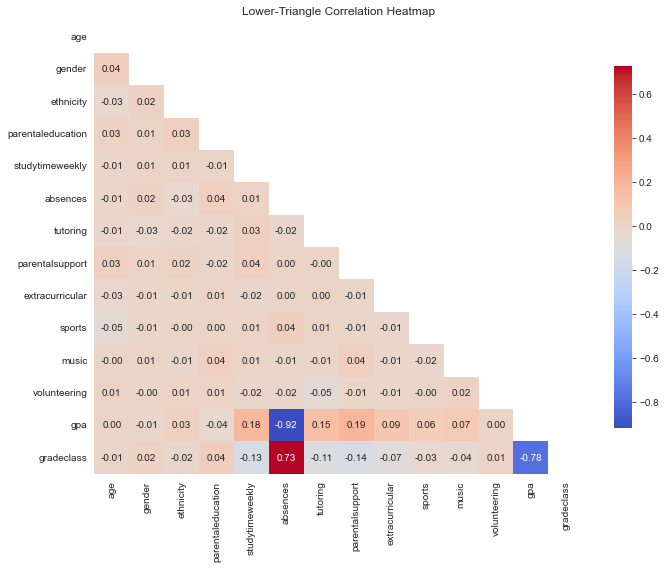

In [15]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, 
            mask=mask,  # Apply the mask
            annot=True,  # Display correlation values
            cmap='coolwarm',  # Choose a color palette
            fmt='.2f',  # Format for the correlation values
            square=False,  # Make the heatmap square-shaped
            cbar_kws={'shrink': 0.8})  # Adjust color bar size
plt.title('Lower-Triangle Correlation Heatmap')
plt.tight_layout()
plt.show()

### 2.5 Pair Plots
Pair plots are an excellent way to visualize relationships between numerical features and your target variable. However, pair plots are more suited for continuous target variables. Since your target variable (GradeClass) is categorical, you can use pair plots to see how the numerical features relate to each class in the target variable, with hue representing the classes.

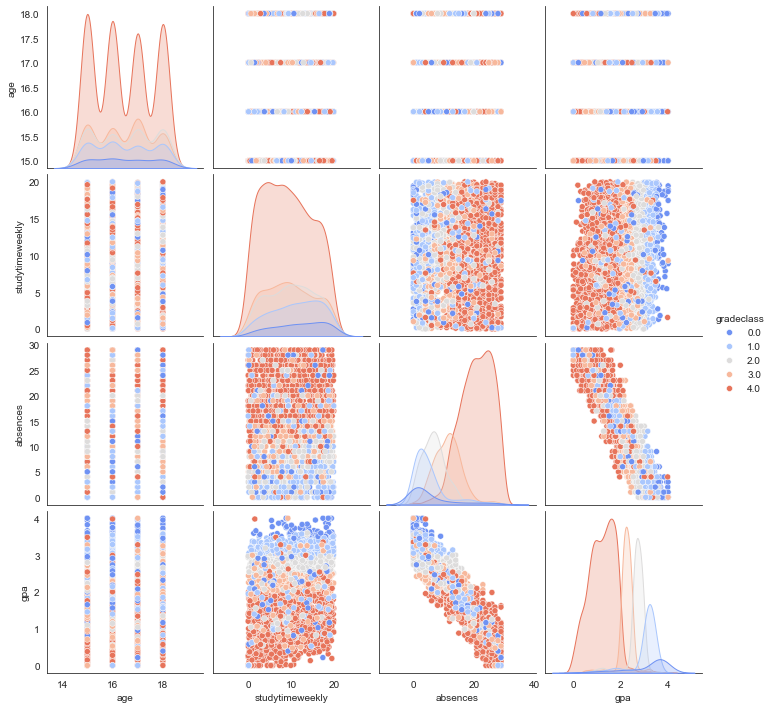

In [ ]:
# Select(subsetting) numerical features and the target variable
features = ['age', 'studytimeweekly', 'absences', 'gpa']
data_subset = df[features + ['gradeclass']]

#Convert target variable for visualization
data_subset['gradeclass'] = data_subset['gradeclass'].astype('category')

# Create a pairplot to visualize the relationships between features and the target variable
sns.pairplot(data_subset, hue='gradeclass', palette='coolwarm');

### Pairplot Analysis Summary

#### Feature Distributions:
- **Age:** Distinct peaks, likely due to specific school grade levels.
- **Study Time:** Right-skewed, indicating most students study fewer hours weekly.
- **Absences:** Right-skewed, meaning most students have low absences, but a few have high.
- **GPA:** Left-skewed, suggesting more students have lower GPAs.

#### Feature Relationships:
- **Absences vs GPA:** Negative correlation—higher absences lead to lower GPA.
- **Study Time vs GPA:** Positive trend—higher study time generally corresponds to higher GPA.
- **Age vs GPA:** No strong relationship.
- **Study Time vs Absences:** No clear correlation.

#### Grade Class Trends:
- **Higher Grade Classes (4.0):** Lower absences, higher study time, and higher GPA.
- **Lower Grade Classes (0.0):** Higher absences, lower study time, and lower GPA.

#### Key Takeaways:
- Absences negatively impact student performance.
- Study time is an important factor but not the only one.
- Distinct feature distributions across grade classes suggest strong classification potential.

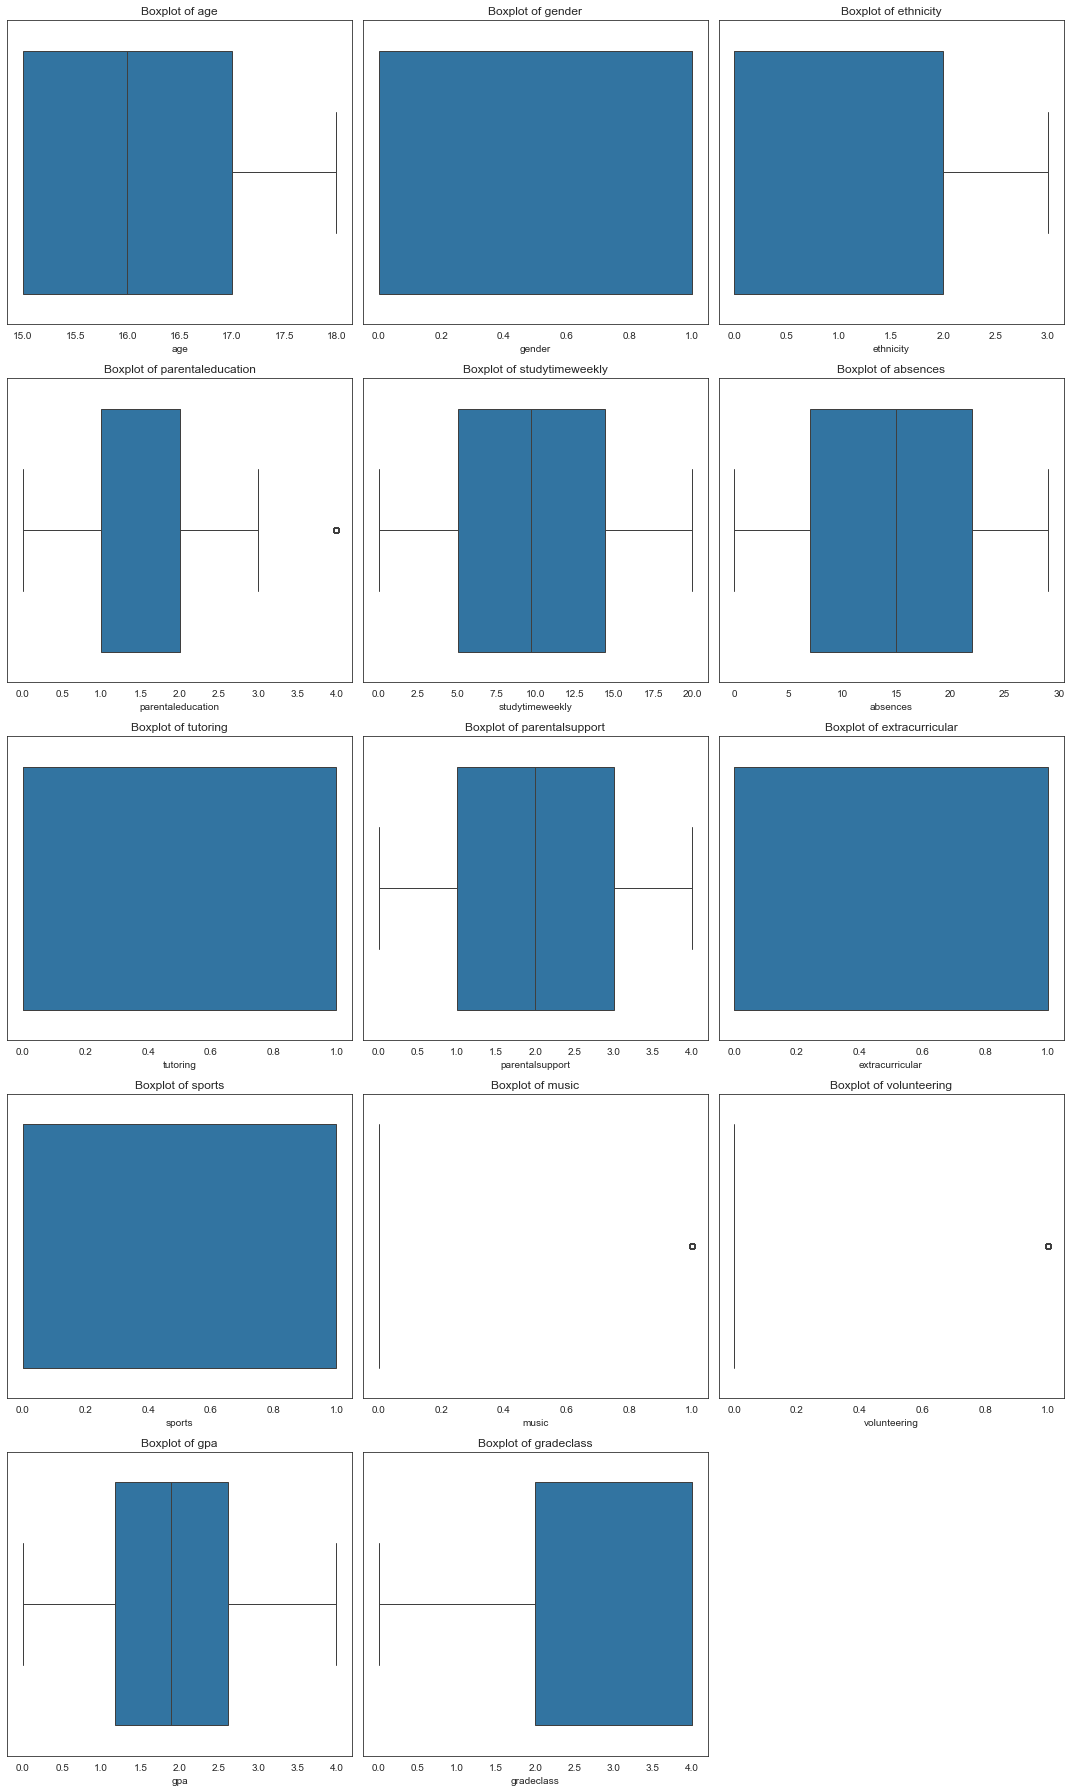

Number of outliers in 'absences': 0
Empty DataFrame
Columns: [studentid, age, gender, ethnicity, parentaleducation, studytimeweekly, absences, tutoring, parentalsupport, extracurricular, sports, music, volunteering, gpa, gradeclass]
Index: []


In [28]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create subplots for boxplots
n_cols = 3  # Number of columns in the grid
n_rows = -(-len(numerical_columns) // n_cols)  # Calculate rows to fit all plots

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

# Remove unused subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Example: Detect outliers using IQR for a specific column (e.g., 'absences')
Q1 = df['absences'].quantile(0.25)
Q3 = df['absences'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['absences'] < lower_bound) | (df['absences'] > upper_bound)]
print(f"Number of outliers in 'absences': {len(outliers)}")
print(outliers)

No outliers were detected in the 'absences' column based on the IQR method.

#### Methodology:
1. **IQR Calculation:**
    - Q1 (25th Percentile): 7.0
    - Q3 (75th Percentile): 22.0
    - IQR (Interquartile Range): 15.0

2. **Outlier Thresholds:**
    - Lower Bound: -15.5
    - Upper Bound: 44.5

3. **Result:** All values in the 'absences' column fall within the calculated thresholds, indicating no outliers.

This suggests that the 'absences' data is well-distributed without extreme deviations.

In [ ]:
# Data Quality Checks

# 1. Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# 2. Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)

# 3. Check for invalid or inconsistent values in categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(f"\nUnique values in '{col}':\n", df[col].unique())

# 4. Check for outliers in numerical columns using IQR
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nNumber of outliers in '{col}': {len(outliers)}")

# 5. Check for invalid data types
print("\nData Types:\n", df.dtypes)

# 6. Check for inconsistent values in numerical columns (e.g., negative values where not expected)
for col in numerical_columns:
    if (df[col] < 0).any():
        print(f"\nColumn '{col}' contains negative values.")


In [29]:
# 1. Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# 2. Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)

# 3. Check for invalid or inconsistent values in categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    print(f"\nUnique values in '{col}':\n", df[col].unique())

# 4. Check for outliers in numerical columns using IQR
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nNumber of outliers in '{col}': {len(outliers)}")

# 5. Check for invalid data types
print("\nData Types:\n", df.dtypes)

# 6. Check for inconsistent values in numerical columns (e.g., negative values where not expected)
for col in numerical_columns:
    if (df[col] < 0).any():
        print(f"\nColumn '{col}' contains negative values.")

Missing Values:
 studentid            0
age                  0
gender               0
ethnicity            0
parentaleducation    0
studytimeweekly      0
absences             0
tutoring             0
parentalsupport      0
extracurricular      0
sports               0
music                0
volunteering         0
gpa                  0
gradeclass           0
dtype: int64

Number of Duplicate Rows: 0

Unique values in 'studentid':
 [1001 1002 1003 ... 3390 3391 3392]

Number of outliers in 'age': 0

Number of outliers in 'gender': 0

Number of outliers in 'ethnicity': 0

Number of outliers in 'parentaleducation': 120

Number of outliers in 'studytimeweekly': 0

Number of outliers in 'absences': 0

Number of outliers in 'tutoring': 0

Number of outliers in 'parentalsupport': 0

Number of outliers in 'extracurricular': 0

Number of outliers in 'sports': 0

Number of outliers in 'music': 471

Number of outliers in 'volunteering': 376

Number of outliers in 'gpa': 0

Number of outliers in 

#### 1. Missing Values:
No missing values were detected in the dataset. All columns have complete data.

#### 2. Duplicate Rows:
No duplicate rows were found in the dataset.

#### 3. Unique Values in `studentid`:
The `studentid` column contains unique identifiers for each student, ensuring no duplicates.

#### 4. Outliers:
- **No Outliers Detected:** `age`, `gender`, `ethnicity`, `studytimeweekly`, `absences`, `tutoring`, `parentalsupport`, `extracurricular`, `sports`, `gpa`, and `gradeclass`.
- **Outliers Detected:**
    - `parentaleducation`: 120 outliers.
    - `music`: 471 outliers.
    - `volunteering`: 376 outliers.

#### Observation on Outliers:
The columns with detected outliers (`parentaleducation`, `music`, and `volunteering`) correspond to activities or attributes with very few students participating or achieving higher levels. These outliers may represent rare cases and should be further analyzed to determine their impact on the dataset.

#### 5. Data Types:
- **Categorical:** `studentid`.
- **Numerical:** All other columns are correctly typed as integers or floats.

#### Key Takeaways:
- The dataset is clean with no missing values or duplicate rows.
- Outliers in `parentaleducation`, `music`, and `volunteering` may require further investigation or treatment depending on their impact on the analysis.
- Data types are consistent with the expected formats.